Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Predictions saved to 'titanic_predictions_with_names.csv'


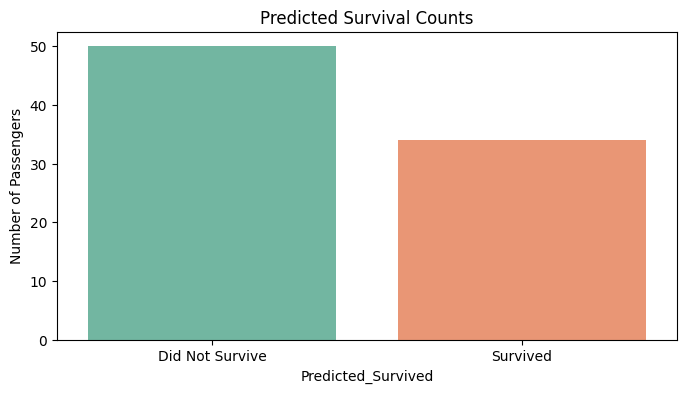

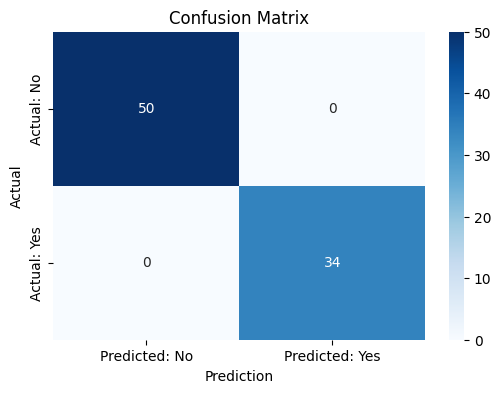

In [6]:
#1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("tested.csv")

names = df[['Name']]


df_features = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)


# 4. Handle missing values (fixed: avoid chained assignment)
df_features['Age'] = df_features['Age'].fillna(df_features['Age'].median())
df_features['Embarked'] = df_features['Embarked'].fillna(df_features['Embarked'].mode()[0])
df_features['Fare'] = df_features['Fare'].fillna(df_features['Fare'].median())



label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df_features[col] = le.fit_transform(df_features[col])
    label_encoders[col] = le


y = df_features['Survived']
X = df_features.drop(['Survived', 'Name'], axis=1)
names = names.loc[X.index]


X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(
    X, y, names, test_size=0.2, random_state=42
)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


results_df = names_test.copy()
results_df['Predicted_Survived'] = y_pred
results_df['Actual_Survived'] = y_test.values


results_df.to_csv("titanic_predictions_with_names.csv", index=False)
print("Predictions saved to 'titanic_predictions_with_names.csv'")


# Plot predicted survival counts with the fix for the warning
plt.figure(figsize=(8, 4))
sns.countplot(x='Predicted_Survived', data=results_df, hue='Predicted_Survived', palette='Set2', legend=False)
plt.title("Predicted Survival Counts")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel("Number of Passengers")
plt.show()



cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()


In [8]:
#2
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


def load_and_preprocess(csv_path="tested.csv"):

    df = pd.read_csv(csv_path)


    df_features = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)


    df_features['Age'] = df_features['Age'].fillna(df_features['Age'].median())
    df_features['Embarked'] = df_features['Embarked'].fillna(df_features['Embarked'].mode()[0])
    df_features['Fare'] = df_features['Fare'].fillna(df_features['Fare'].median())


    label_encoders = {}
    for col in ['Sex', 'Embarked']:
        le = LabelEncoder()
        df_features[col] = le.fit_transform(df_features[col])
        label_encoders[col] = le


    y = df_features['Survived']
    X = df_features.drop(['Survived', 'Name'], axis=1)

    return df, df_features, X, y, label_encoders


def train_model(X, y):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    return model


def predict_new_passenger(df_features, model, label_encoders):
    print("\nEnter the details of the passenger:")

    name = input("Enter Passenger's Name: ")
    pclass = int(input("Enter Pclass (1, 2, or 3): "))
    sex = input("Enter Sex ('male' or 'female'): ").strip().lower()
    age = float(input("Enter Age (in years): "))
    sibsp = int(input("Enter number of Siblings/Spouses aboard: "))
    parch = int(input("Enter number of Parents/Children aboard: "))
    fare = float(input("Enter Fare paid: "))
    embarked = input("Enter Embarked ('C', 'Q', or 'S'): ").strip().upper()


    new_df = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [sex],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],
        'Embarked': [embarked]
    })


    new_df['Age'] = new_df['Age'].fillna(df_features['Age'].median())
    new_df['Fare'] = new_df['Fare'].fillna(df_features['Fare'].median())


    new_df['Sex'] = label_encoders['Sex'].transform(new_df['Sex'])
    new_df['Embarked'] = label_encoders['Embarked'].transform(new_df['Embarked'])

    pred = model.predict(new_df)[0]
    result = "survived" if pred == 1 else "did not survive"

    print(f"\nPassenger {name} {result}.")


def main():

    df, df_features, X, y, label_encoders = load_and_preprocess()
    model = train_model(X, y)

    while True:
        print("\nChoose an option:")
        print("1. Predict survival for a new passenger (manual input)")
        print("2. Exit")
        choice = input("Enter 1 or 2: ").strip()

        if choice == '1':
            predict_new_passenger(df_features, model, label_encoders)
        elif choice == '2':
            print("Exiting.")
            break
        else:
            print("Invalid choice. Please enter 1 or 2.")

if __name__ == "__main__":
    main()



Choose an option:
1. Predict survival for a new passenger (manual input)
2. Exit
Enter 1 or 2: 1

Enter the details of the passenger:
Enter Passenger's Name: sonal
Enter Pclass (1, 2, or 3): 2
Enter Sex ('male' or 'female'): female
Enter Age (in years): 21
Enter number of Siblings/Spouses aboard: 0
Enter number of Parents/Children aboard: 2
Enter Fare paid: 300
Enter Embarked ('C', 'Q', or 'S'): C

Passenger sonal survived.

Choose an option:
1. Predict survival for a new passenger (manual input)
2. Exit
Enter 1 or 2: 1

Enter the details of the passenger:
Enter Passenger's Name: sham
Enter Pclass (1, 2, or 3): 1
Enter Sex ('male' or 'female'): male
Enter Age (in years): 19
Enter number of Siblings/Spouses aboard: 1
Enter number of Parents/Children aboard: 1
Enter Fare paid: 200
Enter Embarked ('C', 'Q', or 'S'): Q

Passenger sham did not survive.

Choose an option:
1. Predict survival for a new passenger (manual input)
2. Exit
Enter 1 or 2: 2
Exiting.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving tested.csv to tested.csv
